In [1]:
# Import the libraries we have used before to re-use in this tutorial.

import numpy # https://numpy.org/

import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt  # https://matplotlib.org/
import seaborn as sns # https://seaborn.pydata.org/

from sklearn import model_selection 
        
from sklearn.metrics import classification_report   
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
print('Loading data from file ...')  # Now let's load the data from the floats.csv file (same as before)
dataset = pandas.read_csv('floats.csv') 
print('done \n')

print('Removing rows with missing data ...')  
dataset = dataset.dropna()  
print('done \n')

# We already know what the floats data looks like from a previous example notebook, so no need for EDA
# Let's set up the same prediction problem: 

print('Reading list of problem variables X and Y...')
X_name = [ 'Depth', 'Temperature', 'Salinity' ] 
X = dataset[X_name]   
y_name = 'callSign'   
y = dataset[y_name]   
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 

Reading list of problem variables X and Y...
done 



In [3]:
# And set up our standard assessment framework:

# We partition our data into two parts: train (for formative development) and test (for summative evaluation) ...
# We also set the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. 
# It ensures the results are directly comparable.
test_pct = 0.20   # reserve a random 20% of the data points for testing performance
seed = 7          # setting the seed means that _the_same_ 20% will be split for testing every time we run this notebook - this allows for repeatability/reproducibility
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)

In [4]:
# Now it's time to train candidate models on the training data (model development phase)
# and cross-validate their performance using the SAME training data (formative development)
# We will not touch the test data until the very end!

# We will first make a list with several models to try out and give them names
models = []
models.append(('KNN-uniform', KNeighborsClassifier(weights='uniform'))) 
models.append(('KNN-distance', KNeighborsClassifier(weights='distance'))) 
models.append(('LR', LogisticRegression()))
# We will also try a variation of Logistic Regression, called Ridge Regression
from sklearn.linear_model import RidgeClassifier
models.append(('Ridge', RidgeClassifier(alpha=10)))

In [5]:
# Now it is time to develop (train and validate) the models on the formative data set

# We will use 5-fold cross validation to estimate the models' capacity to generalize on the reserved test data
# Remember, we do not touch the actual test data yet - we use the training data to validate the model, not test it
k4folds = 5   # This will split our formative dataset into five parts;

scoring_method = 'f1_micro' # Chose the formative scoring method

results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
# create the five folds of the TRAINING data
    print("Splitting data into %s folds" % k4folds)    
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)   
# fit the model using four parts at a time and then validate it on the oher part that was set aside; and repeat five times.
    print("Training model and validating it on each fold") 
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_method) 
    results.append(cv_results)
    names.append(name)
# some fancy footwork for printing the results
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring_method, cv_results.mean(), cv_results.std())
    print(msg)
    print('\n')
    
print('done \n')   # Note that we have not used any of the test data yet!

 ++ NOW WORKING ON ALGORITHM KNN-uniform ++
Splitting data into 5 folds
Training model and validating it on each fold
algorithm KNN-uniform f1_micro results: mean = 0.438623 (std = 0.005631)


 ++ NOW WORKING ON ALGORITHM KNN-distance ++
Splitting data into 5 folds
Training model and validating it on each fold
algorithm KNN-distance f1_micro results: mean = 0.444486 (std = 0.007083)


 ++ NOW WORKING ON ALGORITHM LR ++
Splitting data into 5 folds
Training model and validating it on each fold


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

algorithm LR f1_micro results: mean = 0.314620 (std = 0.005662)


 ++ NOW WORKING ON ALGORITHM Ridge ++
Splitting data into 5 folds
Training model and validating it on each fold
algorithm Ridge f1_micro results: mean = 0.327844 (std = 0.008735)


done 



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


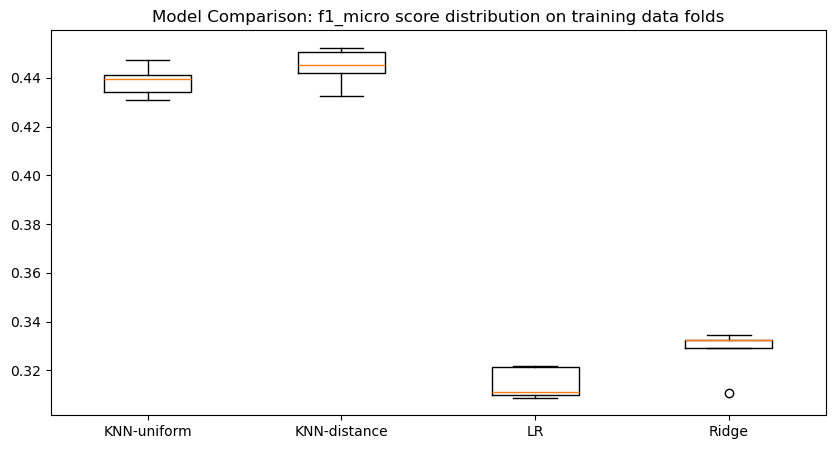

In [6]:

# Graphical comparison 
# We can also create a plot of the model's formative evaluation results 
# and compare the spread and the mean accuracy of each model. 
# There is a population of scoring measures for each model 
# because each model was evaluated several times (k fold cross validation).

fig = plt.figure(figsize=(10, 5)).add_subplot(111) # Create a figure with a single plot inside (1 row, 1 column, 1st plot)
plt.boxplot(results)                               # Draw boxplots for the results of each model
fig.set_xticks(range(1, len(names) + 1))           # Create tickmarks for each model (1-based index for boxplot)
fig.set_xticklabels(names)                         # Place the name of each model at the corresponding tickmark
plt.title('Model Comparison: %s score distribution on training data folds' % scoring_method)
plt.show()

 ++++ Detailed classification report for the selected model ++++ 
Model is KNeighborsClassifier(weights='distance') 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:

 clasification report:
               precision    recall  f1-score   support

    Q4901043       0.81      0.70      0.75       149
    Q4901044       0.86      0.92      0.89       575
    Q4901265       0.34      0.36      0.35       179
    Q4901266       0.19      0.17      0.18       198
    Q4901267       0.23      0.24      0.23       181
    Q4901268       0.14      0.14      0.14       154
    Q4901269       0.21      0.21      0.21       187
    Q4901270       0.21      0.22      0.21       183
    Q4901271       0.17      0.20      0.19        89
    Q4901272       0.16      0.11      0.13        99
    Q4901273       0.00      0.00      0.00        11

    accuracy                           0.45      2005
   macro avg       0.30    

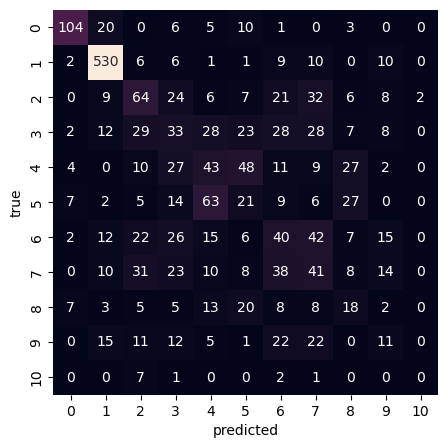

In [7]:
# First we retrain the most capable model using ALL of the training data
selected_model = KNeighborsClassifier(weights='distance')
selected_model.fit(X_train, y_train)

# Next we use this retrained model on the test set and summarize the results 
# as a final confusion matrix and a classification report.
y_predicted = selected_model.predict(X_test)

print(" ++++ Detailed classification report for the selected model ++++ " )
print("Model is %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
print('\n clasification report:\n', classification_report(y_test, y_predicted))  # several metrics reported in table form
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [8]:
# There is a shortcut if we want to chose between different specifications (hyperparameters) for a SINGLE model template
# We call this TUNING the model, and we don't have to code the selection loop by hand 

from sklearn.model_selection import GridSearchCV

# Use GridSearchCV to create a whole family of models that are variations of a single template (e.g., KNeighborsClassifier)
hyperparameters = {'n_neighbors':[3, 4, 5, 6, 7], 'weights':['uniform','distance']}     # specify the configurations of the family members
modelFamily = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=5, scoring=scoring_method)

modelFamily.fit(X_train, y_train)  # train and validate all the family members together

# Select the most promising model version (this is the "tuned" model)
print("Best hyperparameters set found on development (formative) data set:")
print(modelFamily.best_params_)

# Report results for all model variations in the family, to make sure the tuning worked
print("Grid scores on development (formative) data set:")
means = modelFamily.cv_results_['mean_test_score']
stds = modelFamily.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, modelFamily.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print('\n')

Best hyperparameters set found on development (formative) data set:
{'n_neighbors': 5, 'weights': 'distance'}
Grid scores on development (formative) data set:
0.440 (+/-0.015) for {'n_neighbors': 3, 'weights': 'uniform'}
0.447 (+/-0.019) for {'n_neighbors': 3, 'weights': 'distance'}
0.440 (+/-0.005) for {'n_neighbors': 4, 'weights': 'uniform'}
0.449 (+/-0.013) for {'n_neighbors': 4, 'weights': 'distance'}
0.448 (+/-0.009) for {'n_neighbors': 5, 'weights': 'uniform'}
0.450 (+/-0.014) for {'n_neighbors': 5, 'weights': 'distance'}
0.446 (+/-0.011) for {'n_neighbors': 6, 'weights': 'uniform'}
0.448 (+/-0.014) for {'n_neighbors': 6, 'weights': 'distance'}
0.440 (+/-0.012) for {'n_neighbors': 7, 'weights': 'uniform'}
0.444 (+/-0.012) for {'n_neighbors': 7, 'weights': 'distance'}




/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Detailed classification report:
Model is KNeighborsClassifier(weights='distance') 
The model was trained and tuned using cross-validation on the full development (formative) data set.
{'n_neighbors': 5, 'weights': 'distance'}
The reported summative evaluation scores were computed on a separate test data set.


              precision    recall  f1-score   support

    Q4901043       0.81      0.70      0.75       149
    Q4901044       0.86      0.92      0.89       575
    Q4901265       0.34      0.36      0.35       179
    Q4901266       0.19      0.17      0.18       198
    Q4901267       0.23      0.24      0.23       181
    Q4901268       0.14      0.14      0.14       154
    Q4901269       0.21      0.21      0.21       187
    Q4901270       0.21      0.22      0.21       183
    Q4901271       0.17      0.20      0.19        89
    Q4901272       0.16      0.11      0.13        99
    Q4901273       0.00      0.00      0.00        11

    accuracy                          

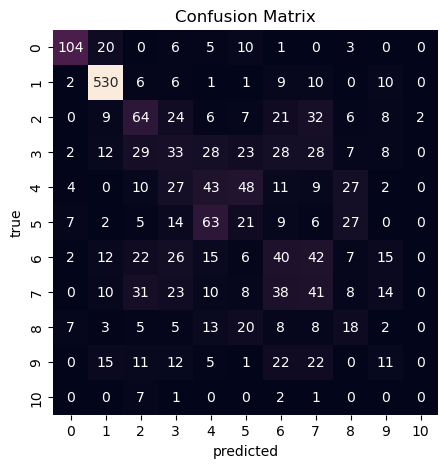

In [9]:
# Report the independent final results for the best (i.e., tuned) family member when tested on the separate summative data set
tuned_model = modelFamily.best_estimator_
print("Detailed classification report:")
print("Model is %s " % tuned_model)
print("The model was trained and tuned using cross-validation on the full development (formative) data set.")
print(modelFamily.best_params_)
print("The reported summative evaluation scores were computed on a separate test data set.")
print('\n')
y_pred = tuned_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('done \n')

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('Confusion Matrix')
plt.show()